# Physical Curiosity Data Analysis
Rinat 15/12/17

In [1]:
print("rinat")

rinat


### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
from scipy.stats import pearsonr
#import NStats

###useful links:

https://matplotlib.org/tutorials/

http://pandas.pydata.org/pandas-docs/stable/

http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.core.groupby.DataFrameGroupBy.hist.html

## Read & Process data

In [2]:
df_demographics = pd.read_csv('demographics.csv', sep=',')
df_tablet = pd.read_csv('tablet.csv', sep=',')
df_summary = pd.DataFrame ()

### Process BFI data

In [3]:
df_BFI = pd.read_csv('BFI.csv', sep=',')
def process_BFI():
    # Reverse BFI:
    df_BFI["BFI_6r"] = 6 - df_BFI["BFI_6"]
    df_BFI["BFI_21r"] = 6 - df_BFI["BFI_21"]
    df_BFI["BFI_9r"] = 6 - df_BFI["BFI_9"]
    df_BFI["BFI_24r"] = 6 - df_BFI["BFI_4"]
    df_BFI["BFI_34r"] = 6 - df_BFI["BFI_34"]
    df_BFI["BFI_2r"] = 6 - df_BFI["BFI_2"]
    df_BFI["BFI_12r"] = 6 - df_BFI["BFI_12"]
    df_BFI["BFI_27r"] = 6 - df_BFI["BFI_27"]
    df_BFI["BFI_37r"] = 6 - df_BFI["BFI_37"]
    df_BFI["BFI_8r"] = 6 - df_BFI["BFI_8"]
    df_BFI["BFI_18r"] = 6 - df_BFI["BFI_18"]
    df_BFI["BFI_23r"] = 6 - df_BFI["BFI_23"]
    df_BFI["BFI_43r"] = 6 - df_BFI["BFI_43"]
    df_BFI["BFI_35r"] = 6 - df_BFI["BFI_35"]
    df_BFI["BFI_41r"] = 6 - df_BFI["BFI_41"]

    # calculate the big 5 factors:
    df_BFI["BFI_extraversion"] = df_BFI[["BFI_1","BFI_6r","BFI_11","BFI_16","BFI_21r","BFI_26","BFI_31","BFI_36"]].mean(axis=1)
    df_BFI["BFI_neuroticism"] = df_BFI[["BFI_4","BFI_9r","BFI_14","BFI_24r","BFI_29","BFI_34r","BFI_39"]].mean(axis=1)
    df_BFI["BFI_agreeableness"] = df_BFI[["BFI_2r","BFI_7","BFI_12r","BFI_17","BFI_22","BFI_27r","BFI_32","BFI_37r","BFI_42"]].mean(axis=1)
    df_BFI["BFI_concientiousness"] = df_BFI[["BFI_3","BFI_8r","BFI_13","BFI_18r","BFI_23r","BFI_28","BFI_33","BFI_38","BFI_43r"]].mean(axis=1)
    df_BFI["BFI_openness"] = df_BFI[["BFI_5","BFI_10","BFI_15","BFI_20","BFI_25","BFI_30","BFI_35r","BFI_40","BFI_41r","BFI_44"]].mean(axis=1)

process_BFI()

### Process AQ data

In [4]:
df_AQ  = pd.read_csv('AQ.csv', sep=',')
def process_AQ():
    # reverse AQ (Autism Spectrum Quotient Questions)
    ## http://aspergerstest.net/interpreting-aq-test-results/

    df_AQ["AQ_3"] = 5 - df_AQ["AQ_3"]
    df_AQ["AQ_8"] = 5 - df_AQ["AQ_8"]
    df_AQ["AQ_10"] = 5 - df_AQ["AQ_10"]
    df_AQ["AQ_11"] = 5 - df_AQ["AQ_11"]
    df_AQ["AQ_14"] = 5 - df_AQ["AQ_14"]
    df_AQ["AQ_15"] = 5 - df_AQ["AQ_15"]
    df_AQ["AQ_17"] = 5 - df_AQ["AQ_17"]
    df_AQ["AQ_24"] = 5 - df_AQ["AQ_24"]
    df_AQ["AQ_25"] = 5 - df_AQ["AQ_25"]
    df_AQ["AQ_27"] = 5 - df_AQ["AQ_27"]
    df_AQ["AQ_28"] = 5 - df_AQ["AQ_28"]
    df_AQ["AQ_29"] = 5 - df_AQ["AQ_29"]
    df_AQ["AQ_30"] = 5 - df_AQ["AQ_30"]
    df_AQ["AQ_31"] = 5 - df_AQ["AQ_31"]
    df_AQ["AQ_32"] = 5 - df_AQ["AQ_32"]
    df_AQ["AQ_34"] = 5 - df_AQ["AQ_34"]
    df_AQ["AQ_36"] = 5 - df_AQ["AQ_36"]
    df_AQ["AQ_37"] = 5 - df_AQ["AQ_37"]
    df_AQ["AQ_38"] = 5 - df_AQ["AQ_38"]
    df_AQ["AQ_40"] = 5 - df_AQ["AQ_40"]
    df_AQ["AQ_44"] = 5 - df_AQ["AQ_44"]
    df_AQ["AQ_47"] = 5 - df_AQ["AQ_47"]
    df_AQ["AQ_48"] = 5 - df_AQ["AQ_48"]
    df_AQ["AQ_49"] = 5 - df_AQ["AQ_49"]
    df_AQ["AQ_50"] = 5 - df_AQ["AQ_50"]

    # Definitely agree or Slightly agree responses to questions 1, 2, 4, 5, 6, 7, 9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 26, 33, 35, 39, 41, 42, 43, 45, 46 score 1 point.
    # Definitely disagree or Slightly disagree responses to questions 3, 8, 10, 11, 14, 15, 17, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 40, 44, 47, 48, 49, 50 score 1 point.

    for column in df_AQ.iloc[:,1:51]:
        df_AQ[column] = (df_AQ[column]>2)*1 # Give one point to questions who score less than 3

    df_AQ["AQ_total"] = df_AQ.iloc[:,1:51].sum(axis=1)

process_AQ()

### Create summary dataframe with all the important variables

In [5]:
def create_df_summary():
    # create data frame with the important data
    df_summary["id"] = df_AQ["id"]
    df_summary["curiosity"] = df_demographics["curiosity"]
    df_summary["demographics_age"] = df_demographics["age"]
    df_summary["demographics_gender"] = df_demographics["gender"]
    df_summary["demographics_grades"] = df_demographics["grades"]
    df_summary["demographics_psychometrics"] = df_demographics["psychometrics"]
    df_summary["demographics_control_robot"] = df_demographics["control_robot"]
    df_summary["demographics_q1"] = df_demographics["q1"]
    df_summary["demographics_q2"] = df_demographics["q2"]
    df_summary["demographics_q3"] = df_demographics["q3"]
    df_summary["tablet_transition_entropy"] = df_tablet["transition_entropy"]
    df_summary["tablet_multi_discipline_entropy"] = df_tablet["Multi_discipline_entropy"]
    df_summary["tablet_psycholetrics"] = df_tablet["PSY"]
    df_summary["tablet_normalized_total_listenning_time"] = df_tablet["normalized_total_listenning_time"]
    df_summary["BFI_extraversion"] = df_BFI["BFI_extraversion"]
    df_summary["BFI_neuroticism"] = df_BFI["BFI_neuroticism"]
    df_summary["BFI_agreeableness"] = df_BFI["BFI_agreeableness"]
    df_summary["BFI_concientiousness"] = df_BFI["BFI_concientiousness"]
    df_summary["BFI_openness"] = df_BFI["BFI_openness"]
    df_summary["AQ_total"] = df_AQ["AQ_total"]
    #print(df_summary)

create_df_summary()

In [6]:
#import NStats as nstats
#x = nstats.CronbachsAlpha (df_summary["BFI_extraversion"])
#print(x)

General description of the data:

df_summary.describe().T

count males (1) and females (0):

In [6]:
df_summary["demographics_gender"].value_counts()

1    27
0    22
dtype: int64

## Plots

### Plot Histograms

In [7]:
def plot_histogram (x):
    
    # n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=1)
    n, bins, patches = plt.hist(x, 10, facecolor='blue', alpha=1)
    plt.xlabel(x.name)
    plt.ylabel('count')
    plt.title(x.name + " histogram")
    #plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
    plt.show()

plot_histogram_by_gender(df_summary["AQ_total"]):

In [8]:
def plot_histogram_by_group(str_var, str_group, labels, bins=10):
    print("plot_histogram_by_group")
    x = df_summary[str_var]
    y = df_summary[str_group]
    df = pd.DataFrame({str(str_var):x, str(str_group):y})
    grouped = df.groupby(str_group)
    groups=[]
    for group in grouped:
        groups.append(group[1][str_var].values)

    fig, axe = plt.subplots(nrows=1, ncols=1)
    colors = ['red','blue']
    axe.hist(groups, bins, histtype='bar',color=colors,label=labels)
    axe.set_title(str_var)
    fig.tight_layout()
    plt.legend(prop={'size': 10})
    plt.show()
    #another way:
    #df_summary["AQ_total"].hist(by=df_summary["demographics_gender"],stacked=True)

In [9]:
print('rinat3')
#plot_histogram_by_group('AQ_total','demographics_gender',['females','males'])

rinat3


In [ ]:
#plot_histogram_by_group('BFI_extraversion','demographics_gender',['females','males'])
plot_histogram(df_summary["BFI_extraversion"])

In [ ]:
plot_histogram_by_group('BFI_neuroticism','demographics_gender',['females','males'])
#plot_histogram(df_summary["BFI_neuroticism"])

In [ ]:
plot_histogram_by_group('BFI_agreeableness','demographics_gender',['females','males'])
#plot_histogram(df_summary["BFI_agreeableness"])

In [ ]:
plot_histogram_by_group('BFI_concientiousness','demographics_gender',['females','males'])
#plot_histogram(df_summary["BFI_concientiousness"])

In [ ]:
plot_histogram_by_group('BFI_concientiousness','demographics_gender',['females','males'])
#plot_histogram(df_summary["BFI_openness"])

In [ ]:
plot_histogram_by_group('tablet_multi_discipline_entropy','demographics_gender',['females','males'])

In [ ]:
plot_histogram_by_group('tablet_transition_entropy','demographics_gender',['females','males'])

looks a bit like a ceiling effect?

### Plot correlation matrix

In [ ]:
corr = df_summary.corr()
corr

In [173]:
def correlation_matrix(df):
    %matplotlib inline
    corr = df.corr()
    #print(corr)
    plt.figure(figsize=(6,6))
    cax = plt.matshow(corr,fignum=1)
    headers = list(df_summary)
    x_pos = np.arange(len(headers))
    plt.xticks(x_pos, headers, rotation='vertical', fontsize=10)
    y_pos = np.arange(len(headers))
    plt.yticks(y_pos, headers, fontsize=10)
    plt.colorbar(cax)
    plt.show()

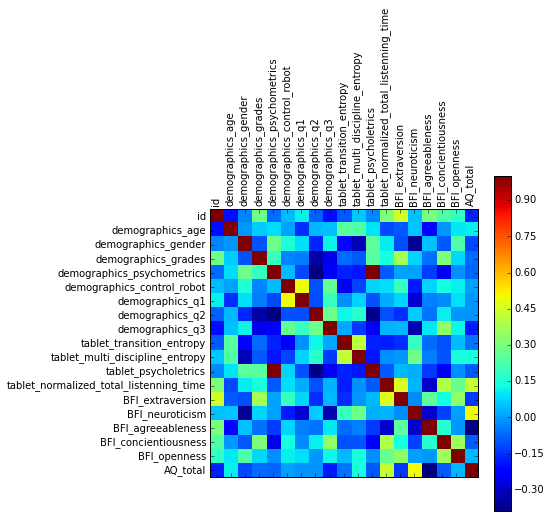

In [185]:
correlation_matrix(df_summary)

### Plot correlations between 2 variables

In [209]:
def plot_correlations(str_var1,str_var2):
    #plt.plot(df_summary["demographics_psychometrics"], df_summary["BFI_extraversion"], 'ro')
    #plt.axis([400, 800, 0, 5])
    #plt.show()
    df_clean = df_summary[[str_var1, str_var2]].dropna()
    print("(r,p-value)=",pearsonr(df_clean[str_var1], df_clean[str_var2]))
    
    x = df_clean[str_var1]
    y = df_clean[str_var2]
    fig, ax = plt.subplots()
    idx = np.isfinite(x) & np.isfinite(y)
    fit = np.polyfit(x[idx], y[idx], deg=1)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    ax.plot(x[idx], fit[0] * x[idx] + fit[1], color='red')
    ax.scatter(x, y)
    fig.show()

('(r,p-value)=', (-0.018892851168046721, 0.89747846885563065))


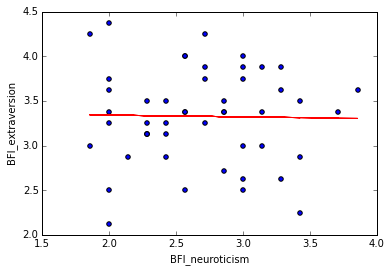

In [212]:
plot_correlations("BFI_neuroticism", "BFI_extraversion")

('(r,p-value)=', (0.029568349100886564, 0.89346134710530489))


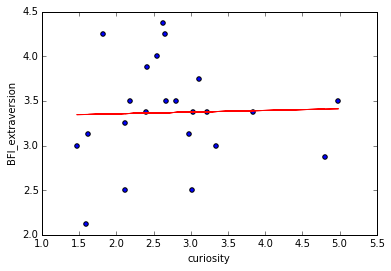

In [401]:
plot_correlations("curiosity", "BFI_extraversion")

('(r,p-value)=', (0.51319613114595919, 0.012266218711246965))


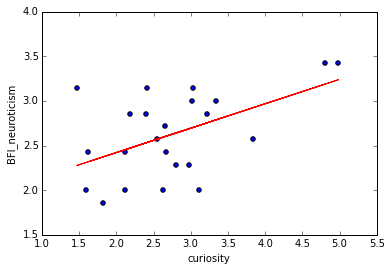

In [402]:
plot_correlations("curiosity", "BFI_neuroticism")

('(r,p-value)=', (-0.051029534436384978, 0.81713486983846439))


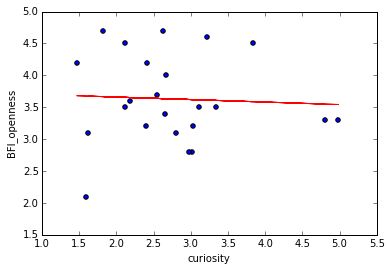

In [408]:
plot_correlations("curiosity", "BFI_openness")

('(r,p-value)=', (0.07581335735098188, 0.73099112385517584))


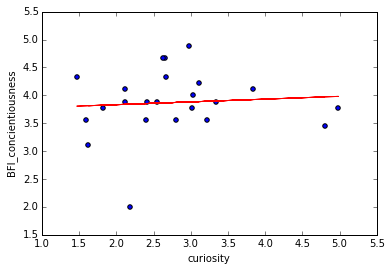

In [409]:
plot_correlations("curiosity", "BFI_concientiousness")

('(r,p-value)=', (0.45091538413280546, 0.030813055120994293))


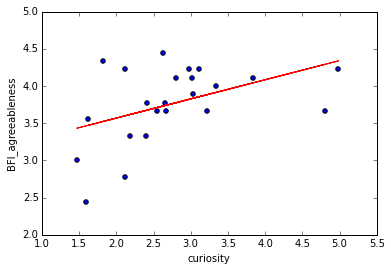

In [410]:
plot_correlations("curiosity", "BFI_agreeableness")

('(r,p-value)=', (0.39126497518069686, 0.064864684330694353))


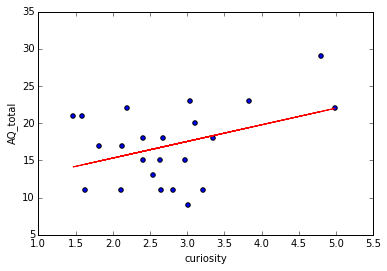

In [412]:
plot_correlations("curiosity", "AQ_total")

('(r,p-value)=', (-0.26200794023107954, 0.25124346836132083))


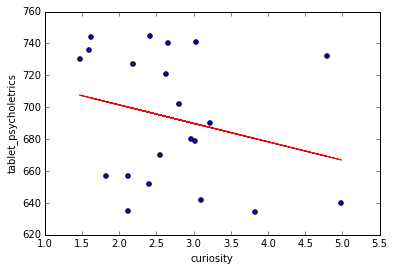

In [413]:
plot_correlations("curiosity", "tablet_psycholetrics")

('(r,p-value)=', (0.27226448616304277, 0.20881687191417833))


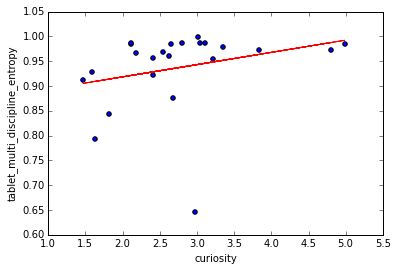

In [414]:
plot_correlations("curiosity", "tablet_multi_discipline_entropy")

('(r,p-value)=', (-0.38171108284613536, 0.0068035033519837258))


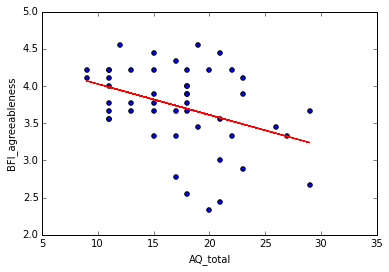

In [403]:
plot_correlations("AQ_total","BFI_agreeableness")

('(r,p-value)=', (0.036605051966013852, 0.80281609669157239))


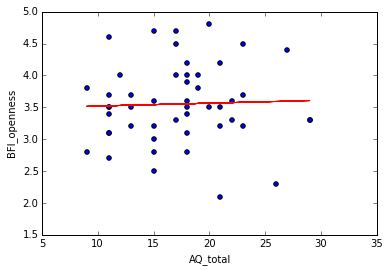

In [407]:
plot_correlations("AQ_total","BFI_openness")

('(r,p-value)=', (-0.38171108284613536, 0.0068035033519837258))


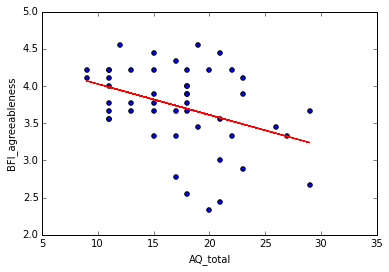

In [213]:
plot_correlations("AQ_total","BFI_agreeableness")

('(r,p-value)=', (0.4268059436006566, 0.023508562203659922))


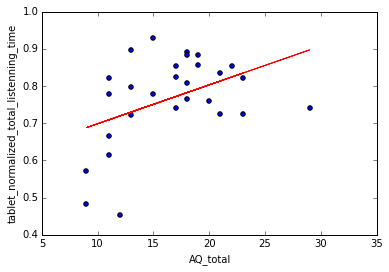

In [214]:
plot_correlations("AQ_total","tablet_normalized_total_listenning_time")

('(r,p-value)=', (0.4685382807284541, 0.011910713699130842))


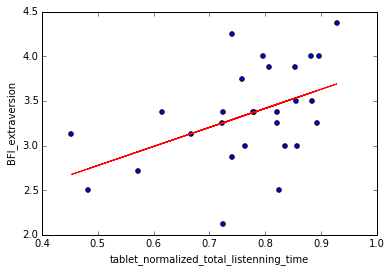

In [215]:
plot_correlations("tablet_normalized_total_listenning_time","BFI_extraversion")

('(r,p-value)=', (0.49702163029044893, 0.00044182717971674365))


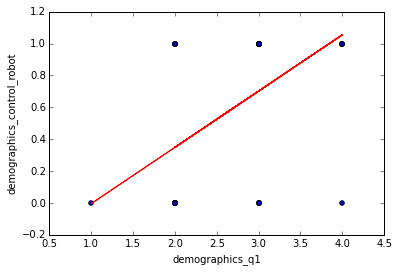

In [216]:
plot_correlations("demographics_q1","demographics_control_robot")

demographics_q1 = כמה קשה היה לך ללמוד לשלוט על הרובוט?
1: קשה מאוד

('(r,p-value)=', (-0.38646168927287217, 0.0087347969661756425))


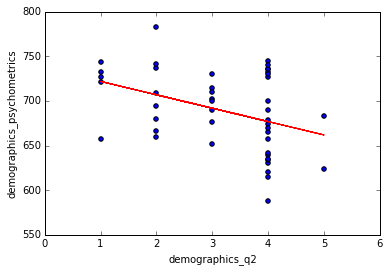

In [222]:
plot_correlations("demographics_q2","demographics_psychometrics")

demographics_q2:
עד כמה הרובוט חכם לדעתך? 1 לא חכם

(ככל שהציון בפסיכומטרי גבוה יותר הם נטו לחשוב שהרובוט לא חכם)

('(r,p-value)=', (0.34000862046765562, 0.018055534686933234))


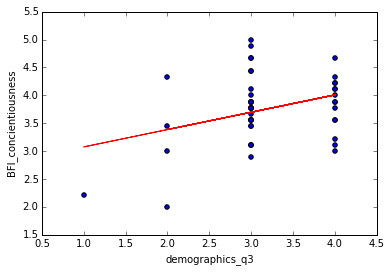

In [221]:
plot_correlations('demographics_q3','BFI_concientiousness')

demographics_q3:
האם נהנית מהאינטראקציה עם הרובוט?
1 לא נהניתי

('(r,p-value)=', (0.41990925930169304, 0.0029662902648097517))


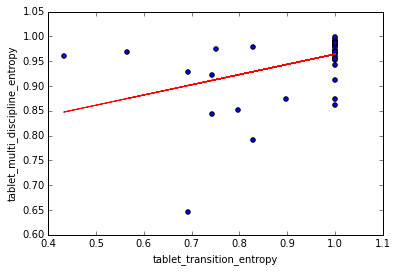

In [219]:
plot_correlations("tablet_transition_entropy", "tablet_multi_discipline_entropy")

In [383]:
x=3
print (x % 3 + 1)
print(str(x))

1
3
